<a href="https://colab.research.google.com/github/Subashini004/Bicycle_Lane_Distribution/blob/main/Bicycle_Lane_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                Theme: Bicycle Lane Distribution

STEP 1 : The command `!pip install -U googlemaps` is used to install or upgrade the `googlemaps` Python package. This package provides a Python client for interacting with the Google Maps API, allowing developers to integrate Google Maps services into their Python applications. The `-U` option ensures that if the package is already installed, it will be upgraded to the latest version.

In [ ]:
!pip install -U googlemaps

  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40711 sha256=172cbb141005ac757bc96b2a0854c140c1b9e75968dbe43ac8b7aee49bab105e
  Stored in directory: /root/.cache/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps



STEP 2 : The command `!pip install osmnx` is used to install the `osmnx` Python package using the pip package manager. `osmnx` is a library for retrieving, modeling, analyzing, and visualizing OpenStreetMap (OSM) data. It simplifies the process of working with OpenStreetMap data, making it easier for developers to access and utilize spatial information from OSM in their Python projects. After running this command, you should have the `osmnx` package available in your Python environment for use in your scripts or projects.

In [ ]:
!pip install osmnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 1.9 MB/s eta 0:00:00



STEP 3 : This code snippet imports three Python libraries:

1. `osmnx as ox`: Imports the `osmnx` library, which is used for working with OpenStreetMap data. It facilitates tasks such as retrieving, modeling, analyzing, and visualizing spatial data from OpenStreetMap.

2. `geopandas as gpd`: Imports the `geopandas` library, an extension of `pandas` for handling spatial data. It allows for the manipulation and analysis of geospatial data using familiar pandas data structures.

3. `matplotlib.pyplot as plt`: Imports the `pyplot` module from the `matplotlib` library. This module is commonly used for creating visualizations, including plots and graphs. In this context, it could be used to visualize geospatial data or other types of data.

Together, these imports suggest that the code may involve tasks related to OpenStreetMap data with `osmnx`, handling spatial data with `geopandas`, and creating visualizations using `matplotlib.pyplot`. The specific functionality of the code will depend on the subsequent lines that are not provided.

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

STEP 4 : This code uses the `osmnx` library to download and visualize bicycle network data for a specified location. Here's a brief explanation:

1. **Import Libraries:**
   - `osmnx as ox`: Used for working with OpenStreetMap data, allowing the retrieval and analysis of network information.
   - `geopandas as gpd`: Handles spatial data, facilitating the creation of GeoDataFrames for nodes and edges.
   - `matplotlib.pyplot as plt`: Used for creating visualizations, in this case, a plot of the bicycle network.

2. **Specify Location:**
   - `new_latitude` and `new_longitude`: Set the coordinates for the new location (here, San Francisco).

3. **Download Bicycle Network Data:**
   - `ox.graph_from_point()`: Downloads the bicycle network data for the specified location within a certain distance (here, 1000 meters).

4. **Create GeoDataFrames:**
   - `ox.graph_to_gdfs()`: Converts the network graph into GeoDataFrames for nodes (`nodes_new`) and edges (`edges_new`).

5. **Plot the Bicycle Routes:**
   - Uses `matplotlib` to create a plot of the bicycle routes (`edges_new`) and nodes (`nodes_new`) on the map.
   - Nodes are plotted in red, and the edges (bicycle routes) are plotted in blue.
   - The resulting plot provides a visualization of the bicycle routes in the specified location.

Overall, the code demonstrates how to use `osmnx` to download and visualize bicycle network data for a given location, showcasing the power of this library for working with spatial data from OpenStreetMap.

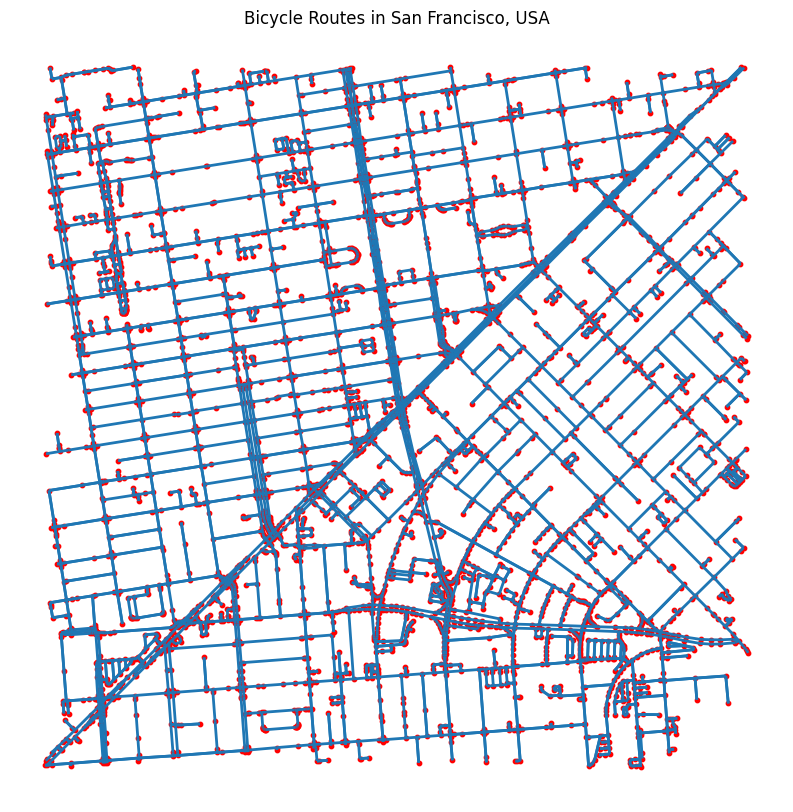

In [ ]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Specify coordinates for a different location (latitude and longitude)
new_latitude = 37.7749
new_longitude = -122.4194  # San Francisco, USA

# Download the bicycle network data for the new location
G_new = ox.graph_from_point((new_latitude, new_longitude), dist=1000, network_type='bike', simplify=False)

# Create nodes and edges GeoDataFrames and fill in all edge geometry attributes
nodes_new, edges_new = ox.graph_to_gdfs(G_new, nodes=True, edges=True)

# Plot the bicycle routes for the new location
fig, ax = plt.subplots(figsize=(10, 10))
edges_new.plot(ax=ax, linewidth=2, edgecolor='tab:blue')
nodes_new.plot(ax=ax, markersize=10, color='red')
plt.title('Bicycle Routes in San Francisco, USA')
plt.axis('off')
plt.show()


STEP 5: This code uses the `matplotlib.pyplot` library to create two types of charts: a bar chart and a pie chart, to visualize data related to different cycling routes. Here's a brief explanation:

1. **Bar Chart: Number of Users on Each Route:**
   - `new_route_names` and `new_user_counts`: Sample data representing the names of cycling routes and the corresponding number of users.
   - `plt.bar()`: Creates a bar chart with route names on the x-axis and the number of users on the y-axis.
   - The chart is colored in orange for visual distinction.
   - `plt.xlabel()`, `plt.ylabel()`, `plt.title()`: Sets labels and a title for the chart.
   - `plt.xticks(rotation=20)`: Rotates x-axis labels for better readability.
   - `plt.show()`: Displays the bar chart.

2. **Pie Chart: Distribution of Users by Category:**
   - `new_user_categories`: Sample data representing user categories for each route.
   - `new_category_counts`: A dictionary to count the occurrences of each user category.
   - `plt.pie()`: Creates a pie chart showing the distribution of users by category.
   - `autopct='%1.1f%%'`: Displays percentage labels on the pie chart.
   - `colors=['lightyellow', 'lightblue']`: Assigns colors to the pie chart segments.
   - `plt.title()`: Sets a title for the pie chart.
   - `plt.show()`: Displays the pie chart.

Overall, the code generates visualizations to represent the number of users on different cycling routes using a bar chart and illustrates the distribution of users by category on these routes using a pie chart.

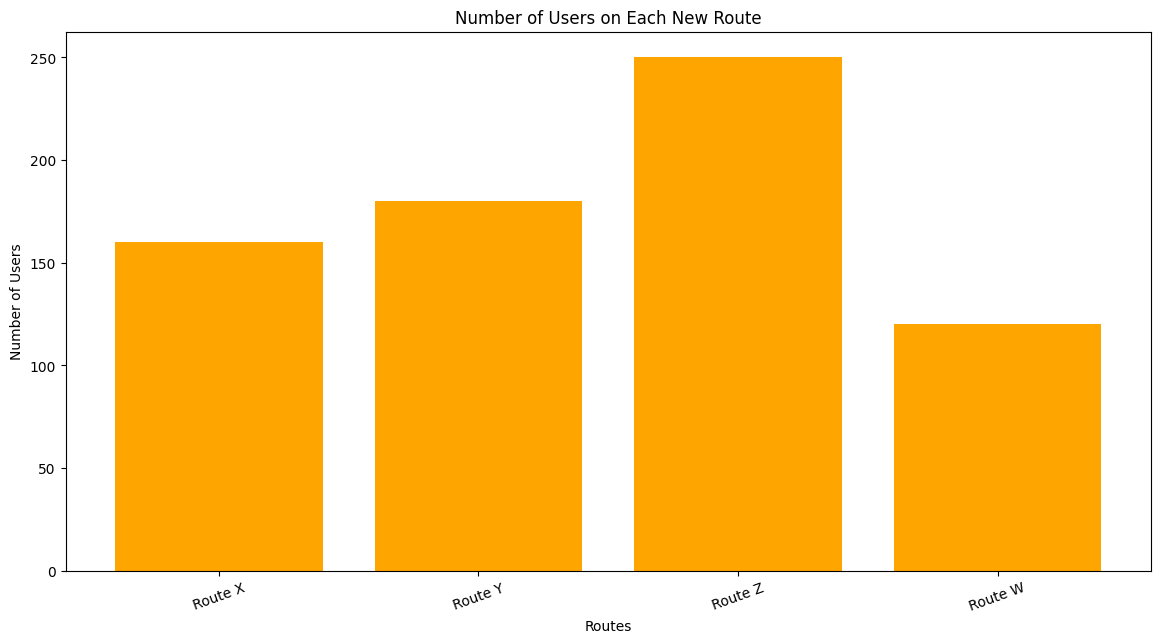

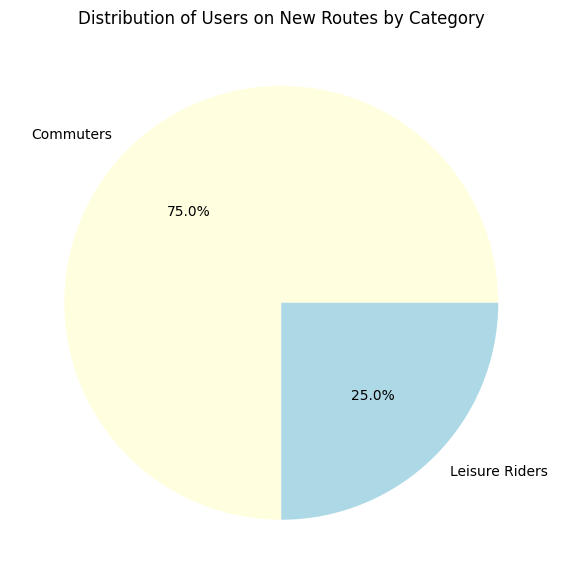

In [ ]:
import matplotlib.pyplot as plt

# Sample route data with user counts (different from the previous example)
new_route_names = ['Route X', 'Route Y', 'Route Z', 'Route W']
new_user_counts = [160, 180, 250, 120]

# Sample user category data (different from the previous example)
new_user_categories = ['Commuters', 'Leisure Riders', 'Commuters', 'Commuters']

# Bar chart: Number of users on each route
plt.figure(figsize=(14, 7))
plt.bar(new_route_names, new_user_counts, color='orange')
plt.xlabel('Routes')
plt.ylabel('Number of Users')
plt.title('Number of Users on Each New Route')
plt.xticks(rotation=20)
plt.show()

# Pie chart: Distribution of users by category (using new user category data)
new_category_counts = {}
for category in new_user_categories:
    if category in new_category_counts:
        new_category_counts[category] += 1
    else:
        new_category_counts[category] = 1

new_categories = list(new_category_counts.keys())
new_category_values = list(new_category_counts.values())

plt.figure(figsize=(7, 10))
plt.pie(new_category_values, labels=new_categories, autopct='%1.1f%%', colors=['lightyellow', 'lightblue'])
plt.title('Distribution of Users on New Routes by Category')
plt.show()


In [ ]:
pip install folium

This code uses the `folium` library to create an interactive map centered on San Francisco, USA, and marks specific restricted places on the map. Here's a brief explanation:

1. **Create a Map:**
   - `folium.Map()`: Initializes a folium map centered on San Francisco (`[37.7749, -122.4194]`) with a zoom level of 15.

2. **Define Restricted Places:**
   - `new_restricted_places`: A list of dictionaries, each containing the name and location (latitude and longitude) of a restricted place.
   - In this example, two places are specified: Golden Gate Park and Fisherman's Wharf.

3. **Mark Restricted Places on the Map:**
   - A loop iterates over the list of restricted places.
   - `folium.Marker()`: Creates a marker for each restricted place on the map.
   - The marker's location is set to the coordinates of the restricted place, and a red icon is used to visually distinguish it.
   - The place's name is displayed as a popup when the marker is clicked.
   - `add_to(m_new)`: Adds the marker to the folium map.

4. **Display the Map:**
   - `m_new`: The folium map object.
   - The last line (`m_new`) in the code is specific to certain environments (like Colab) and is used to display the map directly in the notebook.

Overall, this code generates an interactive map showing the city of San Francisco and marks specific restricted places with red markers. Users can click on the markers to view the names of these restricted places. You can customize the list of restricted places by adding more entries to the `new_restricted_places` list.

In [ ]:
import folium

# Create a map centered on San Francisco, USA
m_new = folium.Map(location=[37.7749, -122.4194], zoom_start=15)

# Define the coordinates of restricted places
new_restricted_places = [
    {'name': 'Golden Gate Park', 'location': [37.7694, -122.4862]},
    {'name': 'Fisherman\'s Wharf', 'location': [37.8080, -122.4177]},
    # Add more restricted places and their coordinates here
]

# Mark restricted places on the map
for place in new_restricted_places:
    folium.Marker(
        location=place['location'],
        popup=place['name'],
        icon=folium.Icon(color='red')
    ).add_to(m_new)

# Display the map in the Colab notebook
m_new


In [ ]:
import folium

# Create a map centered on San Francisco, USA
m_new = folium.Map(location=[37.7749, -122.4194], zoom_start=15)

# Add a marker for a specific location
folium.Marker(
    location=[37.7749, -122.4194],
    popup='San Francisco',
    icon=folium.Icon(color='blue')
).add_to(m_new)

# Add a circle around a specific area
folium.Circle(
    location=[37.7749, -122.4194],
    radius=500,  # in meters
    color='green',
    fill=True,
    fill_color='lightgreen'
).add_to(m_new)

# Display the map in the Colab notebook
m_new


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

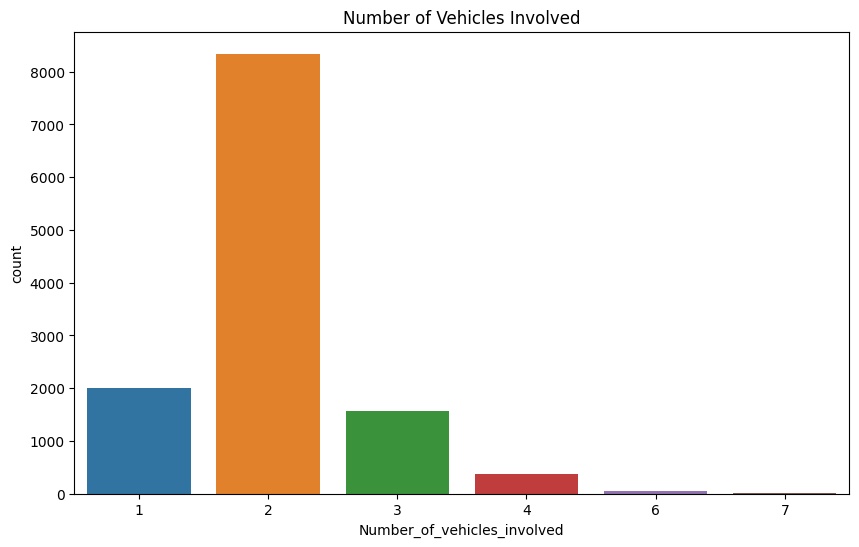

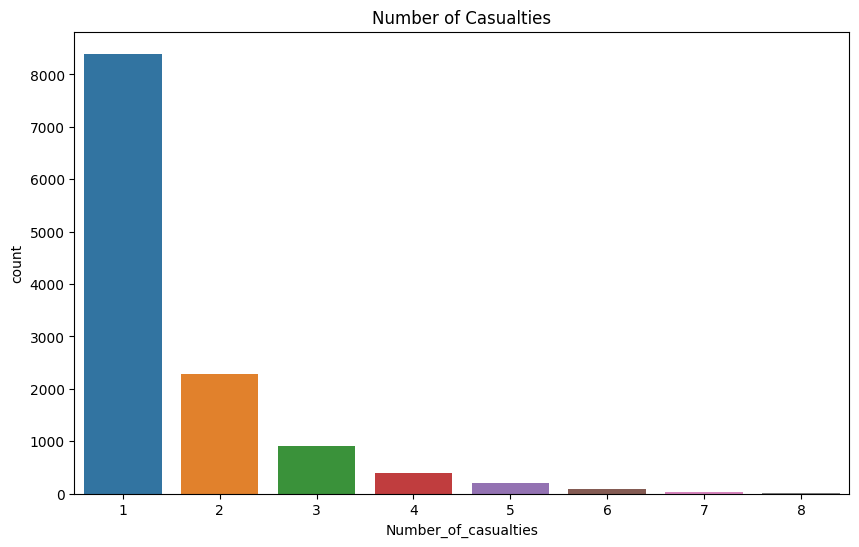

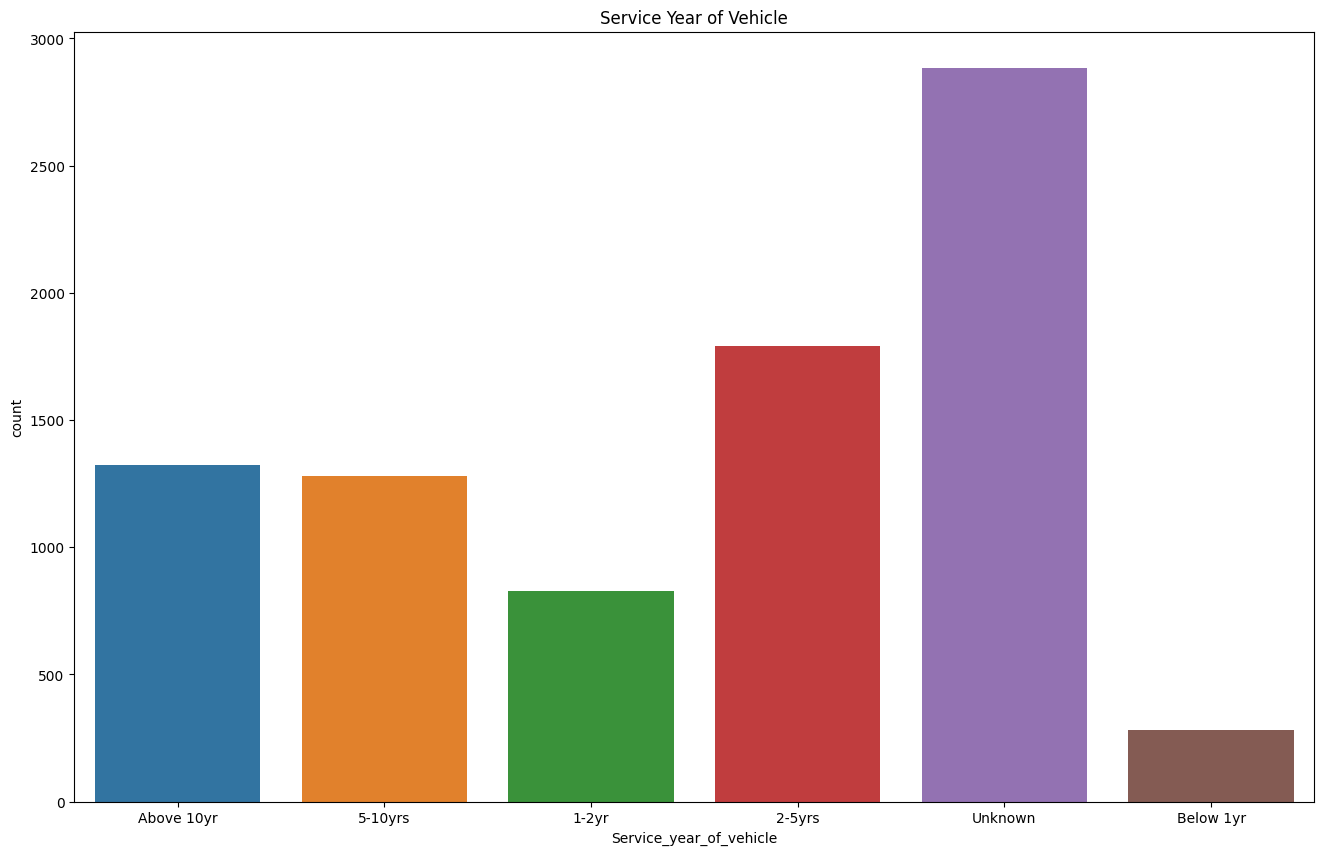

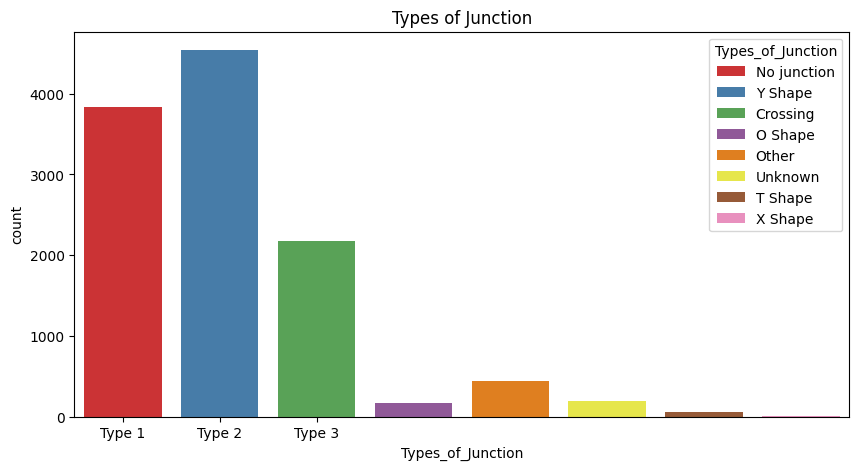

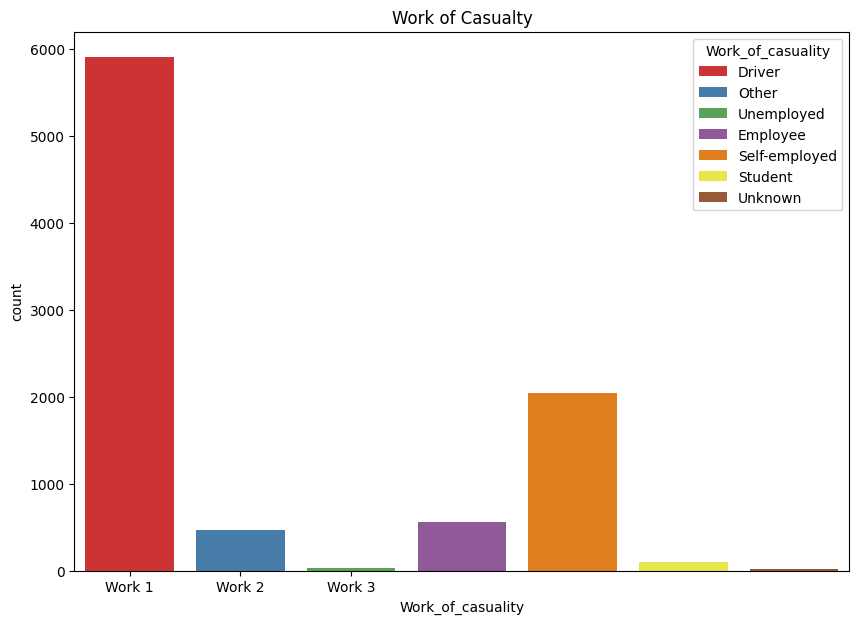

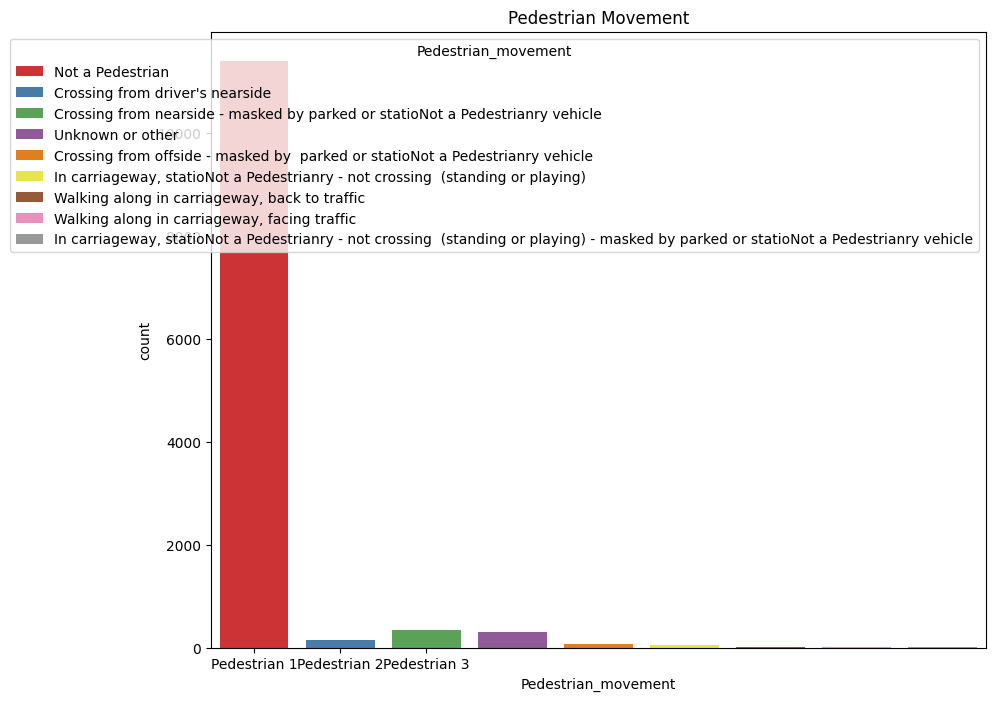

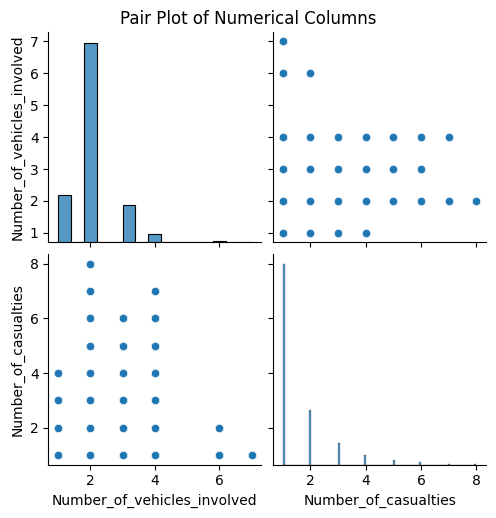

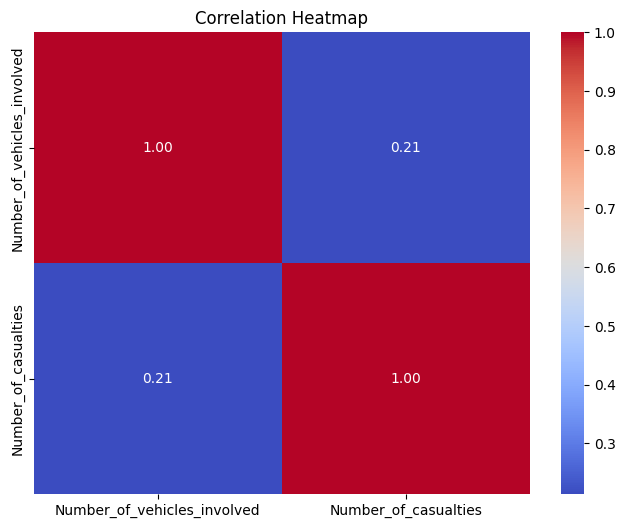

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('/content/RTA Dataset.csv.zip')

# Define mapping for categorical variables
junction_mapping = {1: 'Type 1', 2: 'Type 2', 3: 'Type 3'}  # Replace with actual values
work_mapping = {1: 'Work 1', 2: 'Work 2', 3: 'Work 3'}  # Replace with actual values
pedestrian_mapping = {1: 'Pedestrian 1', 2: 'Pedestrian 2', 3: 'Pedestrian 3'}  # Replace with actual values

# Countplot for 'Number_of_vehicles_involved'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Number_of_vehicles_involved')
plt.title('Number of Vehicles Involved')
plt.show()

# Countplot for 'Number_of_casualties'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Number_of_casualties')
plt.title('Number of Casualties')
plt.show()

# Countplot for 'Service_year_of_vehicle'
plt.figure(figsize=(16, 10))
sns.countplot(data=data, x='Service_year_of_vehicle')
plt.title('Service Year of Vehicle')
plt.show()

# Countplot for 'Types_of_Junction' with mapping
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Types_of_Junction', hue='Types_of_Junction', palette='Set1', dodge=False)
plt.title('Types of Junction')
plt.xticks(ticks=[0, 1, 2], labels=['Type 1', 'Type 2', 'Type 3'])
plt.show()

# Countplot for 'Work_of_casuality' with mapping
plt.figure(figsize=(10, 7))
sns.countplot(data=data, x='Work_of_casuality', hue='Work_of_casuality', palette='Set1', dodge=False)
plt.title('Work of Casualty')
plt.xticks(ticks=[0, 1, 2], labels=['Work 1', 'Work 2', 'Work 3'])
plt.show()

# Countplot for 'Pedestrian_movement' with mapping
plt.figure(figsize=(10, 8))
sns.countplot(data=data, x='Pedestrian_movement', hue='Pedestrian_movement', palette='Set1', dodge=False)
plt.title('Pedestrian Movement')
plt.xticks(ticks=[0, 1, 2], labels=['Pedestrian 1', 'Pedestrian 2', 'Pedestrian 3'])
plt.show()

# Pair plot for numerical columns
numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

# Correlation heatmap for numerical columns
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()